In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy import stats

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


# Getting Dataframes

Given DataFrame

In [2]:
master_data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
data = master_data
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Data Wrangling

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
data.shape

(1460, 81)

In [56]:
pd.set_option('display.max_rows',None)
data.isna().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

remove MiscFeature columns as it appears useless and redundant to MiscVal column

In [58]:
data = data.drop(['MiscFeature'], axis=1)

In [60]:
print("shape of final data", data.shape)

shape of final data (1460, 80)


# Feature Engineering

## Separating independent and dependent variables

In [61]:
X_data=data
X_data=X_data.drop(['SalePrice'], axis=1)

In [62]:
Y_data=data['SalePrice']
Y_data.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

## One hot encoding

In [63]:
print("shape before one hot encoding", X_data.shape)
X_data=pd.get_dummies(X_data)

dummies_frame = pd.get_dummies(X_data)
X_submit=X_submit.reindex(columns = dummies_frame.columns, fill_value=0)
#X_test=pd.get_dummies(X_test)

print("shape after one hot encoding", X_data.shape)
X_data.head()

shape before one hot encoding (1460, 79)
shape after one hot encoding (1460, 285)


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0


Drop NaNs

In [16]:
X_data=X_data.fillna(0)

In [17]:
print("shape of X_data", X_data.shape)

shape of X_data (1460, 285)
shape of X_submit (1459, 285)


## Data Scaling

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled_data = scaler.fit_transform(X_data)
X_scaled_submit = scaler.transform(X_submit)
X_scaled_data

array([[-1.73086488,  0.07337496,  0.2128772 , ..., -0.11785113,
         0.4676514 , -0.30599503],
       [-1.7284922 , -0.87256276,  0.64574726, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [-1.72611953,  0.07337496,  0.29945121, ..., -0.11785113,
         0.4676514 , -0.30599503],
       ...,
       [ 1.72611953,  0.30985939,  0.2417352 , ..., -0.11785113,
         0.4676514 , -0.30599503],
       [ 1.7284922 , -0.87256276,  0.29945121, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [ 1.73086488, -0.87256276,  0.50145724, ..., -0.11785113,
         0.4676514 , -0.30599503]])

In [19]:
print("Memory size of numpy array in bytes:", X_scaled_data.size * X_scaled_data.itemsize)

Memory size of numpy array in bytes: 3328800


making sure no NaNs

In [24]:
np.any(np.isnan(X_scaled_data))

False

## Train Test split

In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled_data, Y_data, test_size=0.33, random_state=42)

print("shape of training data", X_train.shape)
print("shape of testing data", X_test.shape)

shape of training data (978, 285)
shape of testing data (482, 285)


# Linear/Polynomial Regression

iteration =  1
Memory size of numpy array in bytes in MB: 2.237664
iteration =  2
Memory size of numpy array in bytes in MB: 321.104784
[-6.737439346450269e+23, 0.8010567171150325]


<function matplotlib.pyplot.show(close=None, block=None)>

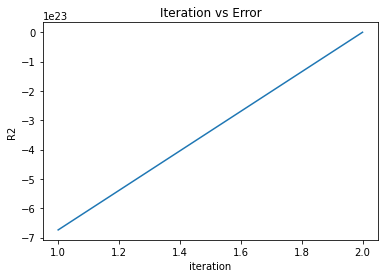

In [26]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

errors=[]

sweep = np.arange(1, 3, 1, dtype=int)
for i in sweep:
    print("iteration = ", i)
    poly = PolynomialFeatures(degree = i)
    
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.transform(X_test)
    print("Memory size of numpy array in bytes in MB:", X_poly_train.size * X_poly_train.itemsize / 1000000)
    
    reg = LinearRegression()
    reg.fit(X_poly_train, Y_train)
    
    errors.append(reg.score(X_poly_test, Y_test))
    
print(errors)

import matplotlib.pyplot as plt
plt.figure()
plt.plot(sweep, errors)
plt.xlabel("iteration")
plt.ylabel("R2")
plt.title("Iteration vs Error")
plt.show

Above degree of 2, memory size increases above our machine limit.

# Random Forest Regression

## train test split

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled_data, Y_data, test_size=0.33, random_state=42)

print("shape of training data", X_train.shape)
print("shape of testing data", X_test.shape)

shape of training data (978, 285)
shape of testing data (482, 285)


In [36]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=100)
forest.fit(X_train, Y_train)

forest.score(X_test, Y_test)

0.8624934665421555

# Gradient Boosting

In [57]:
from sklearn.ensemble import GradientBoostingRegressor

boost = GradientBoostingRegressor(random_state=0)
boost.fit(X_train, Y_train)

boost.score(X_test, Y_test)

0.8655662383358196

### From above code we see that both gradient boosting and random forest regression give us good accuracy